# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("C:\\Users\\keerthi\\Downloads\\Pokemon.csv")

In [4]:
data.shape

(800, 13)

In [5]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# EDA

In [6]:
del data['#']

In [7]:
data['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [8]:
data.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
data['Type 2'].fillna(data['Type 1'],inplace=True)

In [10]:
data.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [11]:
data.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [12]:
data['Type 2'].value_counts()

Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Ice         27
Steel       27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64

# Visualizations

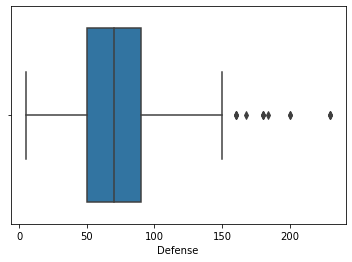

In [13]:
sns.boxplot(data.Defense)

In [14]:
def comp_pok(name1,name2,param):
    a = data[(data.Name == name1) | (data.Name ==name2)]
    sns.factorplot(x='Name',y=param,data=a,kind='bar',size=5,aspect=1,palette=['#0000ff','#FFB6C1'])

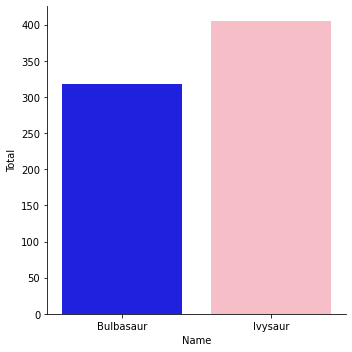

In [15]:
comp_pok('Bulbasaur','Ivysaur','Total')

# Data Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(data)

# Input & Output

In [20]:
X = data[['HP','Attack','Defense','Speed','Generation','Sp. Atk','Sp. Def']]
y = data['Legendary']

In [21]:
y.unique

<bound method Series.unique of 0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool>

In [22]:
X.head()

,HP,Attack,Defense,Speed,Generation,Sp. Atk,Sp. Def
0,45,49,49,45,1,65,65
1,60,62,63,60,1,80,80
2,80,82,83,80,1,100,100
3,80,100,123,80,1,122,120
4,39,52,43,65,1,60,50


In [23]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

# Train & Test Split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [25]:
y_train.head()

475    False
175    False
10     False
419     True
68     False
Name: Legendary, dtype: bool

# Modelling

In [26]:
clf = RandomForestClassifier(n_estimators=100)
svmclassifier = SVC(kernel='linear')
#regressor = LinearRegression()
logisticregressionclassifier= LogisticRegression(random_state=0)
decisionTreeClassifier = DecisionTreeClassifier(random_state=0)
naivebayesclassifier = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
#kmeans = KMeans(n_clusters=3)

# Fitting

In [27]:
#regressor.fit(X_train,y_train)
clf.fit(X_train,y_train)
svmclassifier.fit(X_train,y_train)
logisticregressionclassifier.fit(X_train,y_train)
decisionTreeClassifier.fit(X_train,y_train)
naivebayesclassifier.fit(X_train,y_train)
knn.fit(X_train, y_train)
#outoutput = kmeans.fit(X_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
cm = confusion_matrix(y_pred,y_test)

In [32]:
cm

array([[109,   7],
       [  2,   2]], dtype=int64)

In [33]:
accuracy_score(y_pred,y_test)

0.925

In [34]:
svmclassifier.predict([[80,110,60,70,6,150,130]])

array([ True])

In [35]:
y_pred1 = svmclassifier.predict(X_test)

In [36]:
accuracy_score(y_pred1,y_test)

0.9416666666666667

In [37]:
confusion_matrix(y_pred1,y_test)

array([[108,   4],
       [  3,   5]], dtype=int64)

In [38]:
y_pred2 = logisticregressionclassifier.predict(X_test)

In [39]:
logisticregressionclassifier.predict([[80,110,60,70,6,150,130]])

array([ True])

In [40]:
accuracy_score(y_pred2,y_test)

0.9416666666666667

In [41]:
confusion_matrix(y_pred2,y_test)

array([[108,   4],
       [  3,   5]], dtype=int64)

In [42]:
y_pred3 = naivebayesclassifier.predict(X_test)

In [43]:
accuracy_score(y_pred3,y_test)

0.925

In [44]:
y_pred4 = knn.predict(X_test)
confusion_matrix(y_pred4,y_test)

array([[110,   6],
       [  1,   3]], dtype=int64)

In [45]:
accuracy_score(y_pred4,y_test)

0.9416666666666667

In [46]:
clf.predict([[108,100,121,95,6,81,95]])

array([False])

In [47]:
y_pred5 = decisionTreeClassifier.predict(X_test)

In [48]:
confusion_matrix(y_pred5,y_test)

array([[106,   6],
       [  5,   3]], dtype=int64)

In [49]:
accuracy_score(y_pred5,y_test)

0.9083333333333333

In [50]:
y_pred5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [51]:
np.array(y_test)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [52]:
decisionTreeClassifier.predict([[108,100,121,95,6,81,95]])

array([False])